In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Srinivasa Rao/OneDrive/Documents/GUVI Files/Datasets/CrimesOnWomenData.csv")
df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


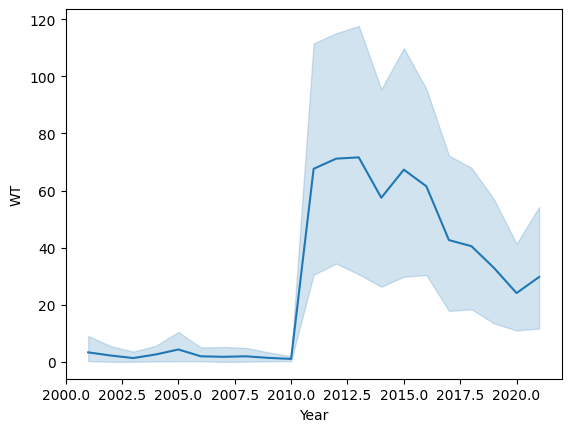

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

X = df['Year']
y = df['WT']
sns.lineplot(x=X,y=y)
plt.show()


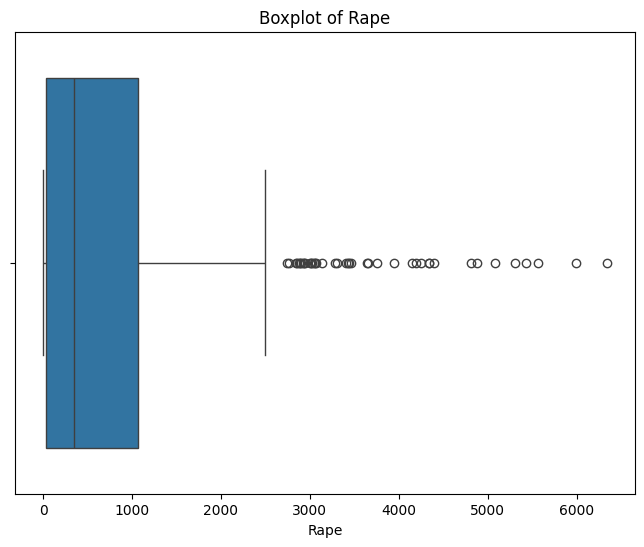

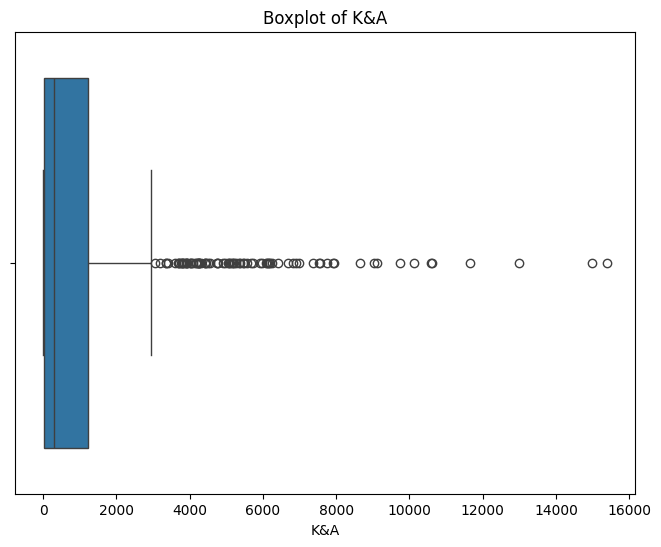

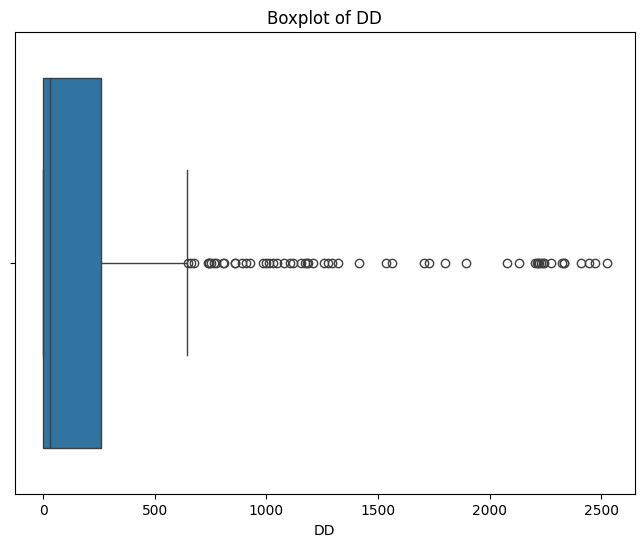

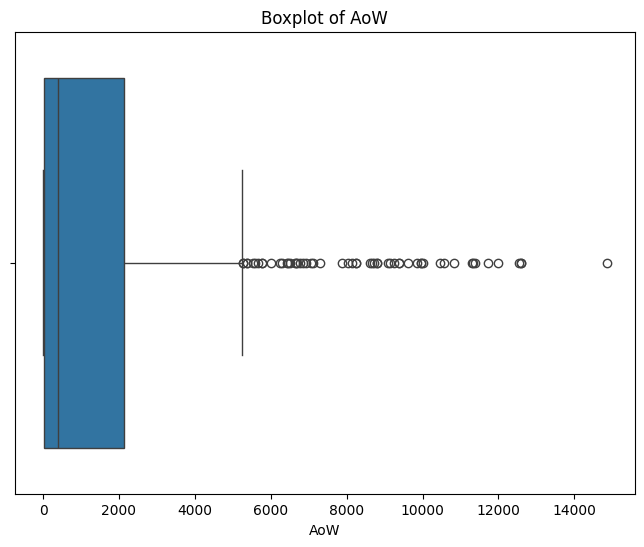

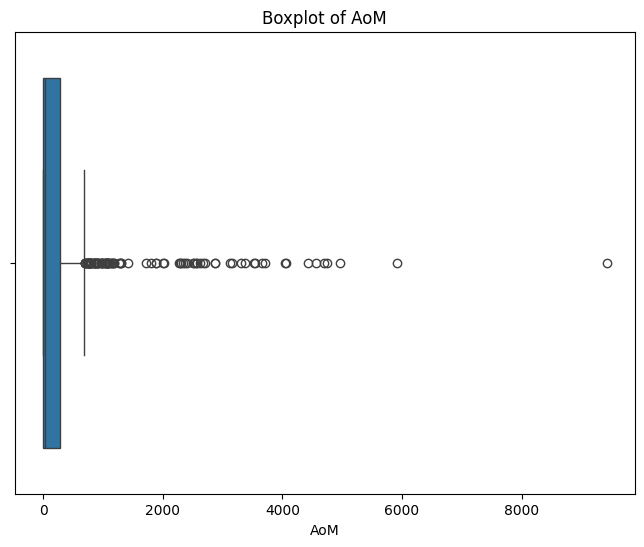

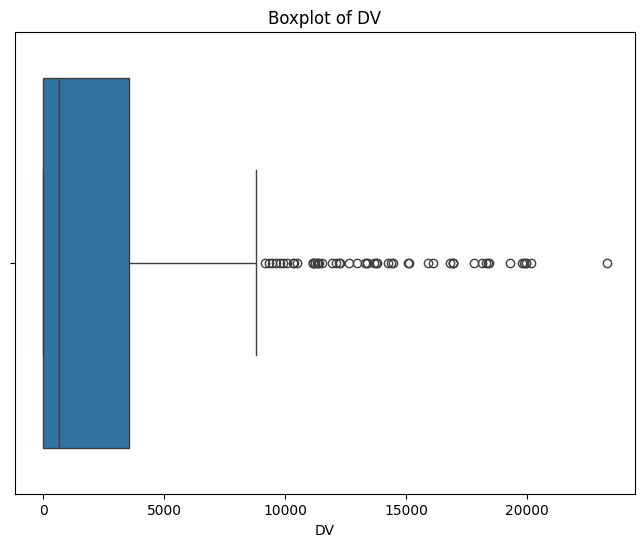

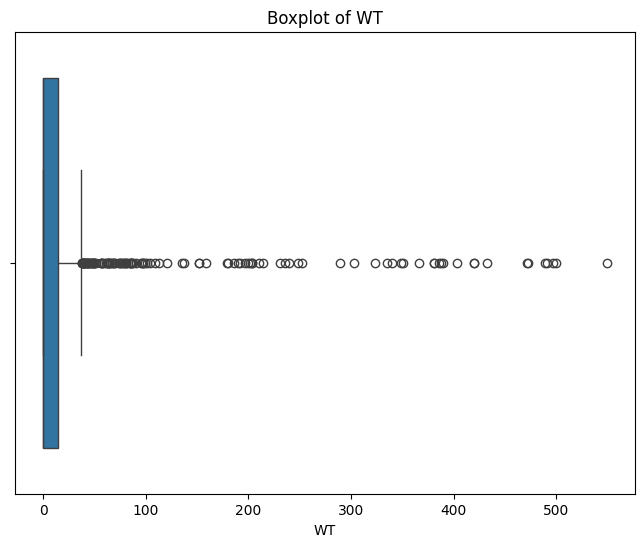

In [5]:
col = ['Rape','K&A','DD','AoW','AoM','DV','WT']
for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()
    

In [6]:
import numpy as np
df['Rape'] = np.log(df['Rape'])
df['K&A'] = np.log(df['K&A'])
df['AoW'] = np.log(df['AoW'])
df['AoM'] = np.log(df['AoM'])
df['DV'] = np.log(df['DV'])
df['WT'] = np.log(df['WT'])

c:\Users\Srinivasa Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


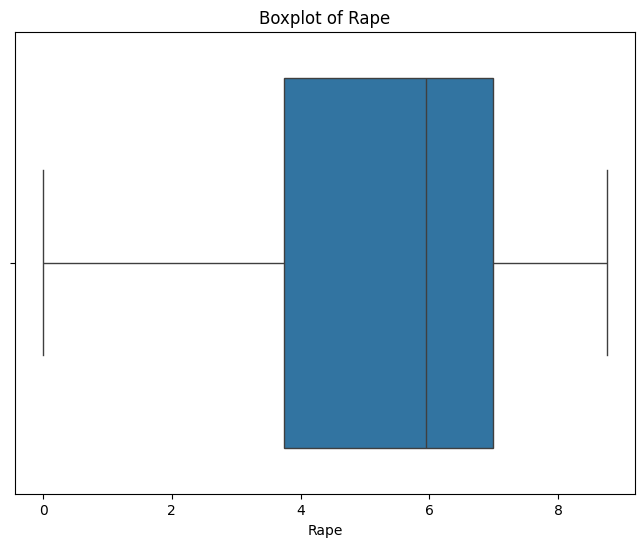

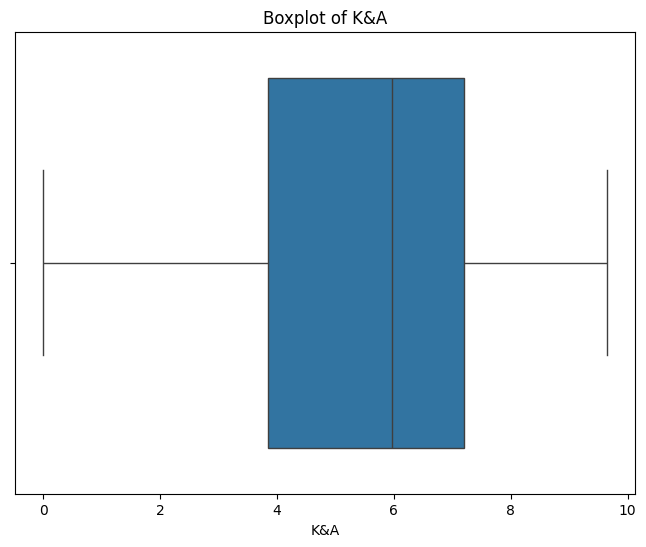

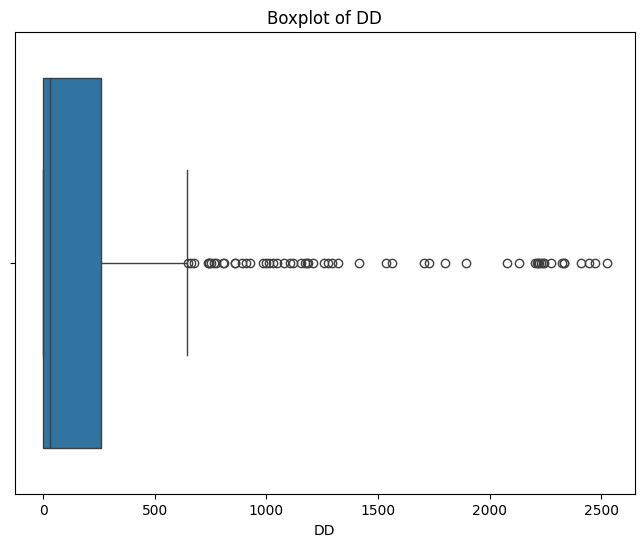

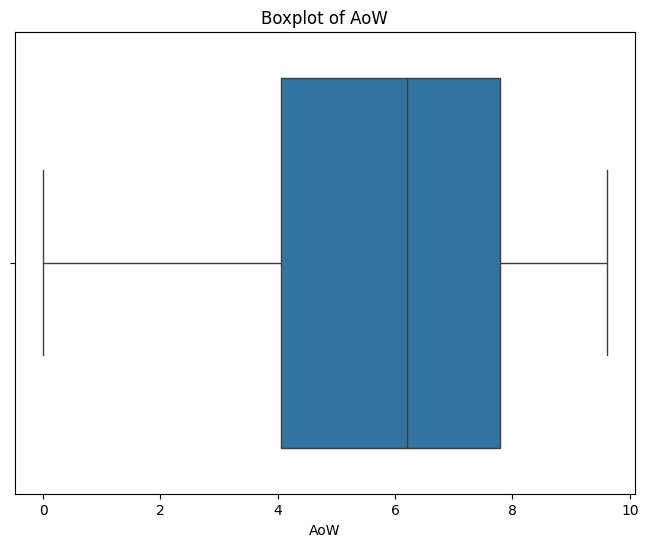

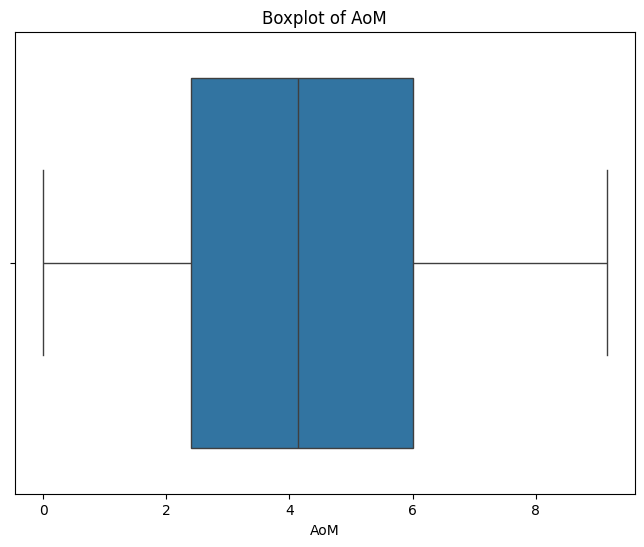

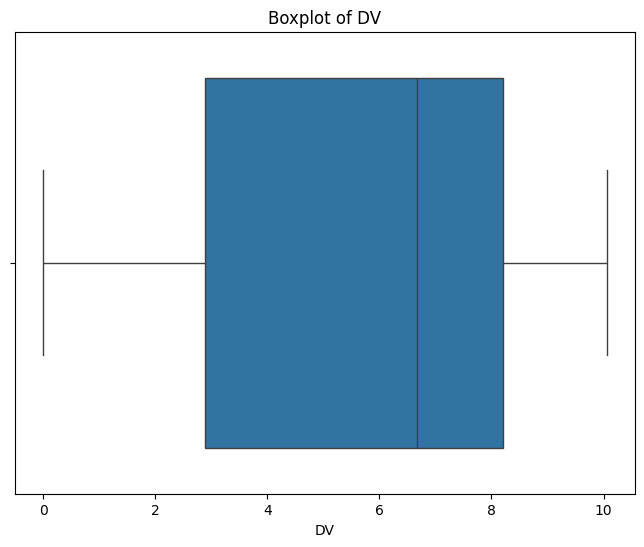

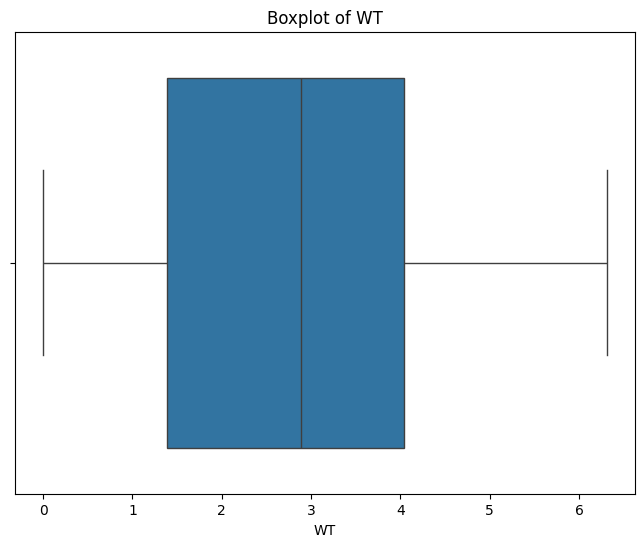

In [7]:
col = ['Rape','K&A','DD','AoW','AoM','DV','WT']
for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [16]:
import pandas as pd


# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['State'])

print(df_encoded)


     Unnamed: 0  Year      Rape       K&A   DD       AoW       AoM        DV  \
0             0  2001  6.769642  6.639876  420  8.173011  7.727976  8.664060   
1             1  2001  3.496508  4.007333    0  4.356709  1.098612  2.397895   
2             2  2001  6.705639  6.975414   59  6.745236  1.386294  7.129298   
3             3  2001  6.788972  6.249975  859  6.331502  3.044522  7.351158   
4             4  2001  6.865891  5.141664   70  7.474772  5.081404  6.733402   
..          ...   ...       ...       ...  ...       ...       ...       ...   
731         731  2021  7.130899  8.314587  141  7.634337  6.033086  8.461892   
732         732  2021  5.752573  6.806829   16  7.523481  2.302585  6.216606   
733         733  2021  0.693147  0.000000    0  1.609438  0.000000  2.197225   
734         734  2021      -inf      -inf    0  0.000000  0.000000  1.098612   
735         735  2021  0.693147      -inf    2  3.433987  1.098612  2.484907   

           WT  State_A & N ISLANDS  ...

In [17]:
New_df = pd.concat([df_encoded['K&A'] ,df_encoded['AoW']], axis=1)
New_df = New_df.dropna()
New_df1 = New_df[~New_df['K&A'].isin([np.inf, -np.inf])]
New_df1

,K&A,AoW
0,6.639876,8.173011
1,4.007333,4.356709
2,6.975414,6.745236
3,6.249975,6.331502
4,5.141664,7.474772
...,...,...
729,4.787492,3.610918
730,3.135494,1.945910
731,8.314587,7.634337
732,6.806829,7.523481


In [18]:
New_df2 = df_encoded['Rape'].dropna()
New_df2

0      6.769642
1      3.496508
2      6.705639
3      6.788972
4      6.865891
         ...   
731    7.130899
732    5.752573
733    0.693147
734        -inf
735    0.693147
Name: Rape, Length: 736, dtype: float64

In [20]:
New_df = pd.concat([df_encoded['K&A'] ,df_encoded['AoW']], axis=1)
New_df = New_df.dropna()
New_df1 = New_df[~New_df['K&A'].isin([np.inf, -np.inf])]
New_df1

,K&A,AoW
0,6.639876,8.173011
1,4.007333,4.356709
2,6.975414,6.745236
3,6.249975,6.331502
4,5.141664,7.474772
...,...,...
729,4.787492,3.610918
730,3.135494,1.945910
731,8.314587,7.634337
732,6.806829,7.523481


In [107]:
Data = pd.concat([New_df1,New_df2],axis=1)
Data = Data.dropna()
Data
Data = Data[~Data['K&A'].isin([np.inf, -np.inf])]
Data = Data[~Data['AoW'].isin([np.inf, -np.inf])]
Data = Data[~Data['Rape'].isin([np.inf, -np.inf])]
Data.to_csv('DataR.csv',index='False')

In [108]:
#Rape and K&A have a correlation of 0.84
#Rape and AoW have a correlation of 0.88

# Calculate the correlation between Column1 and Column2
correlation = Data['K&A'].corr(Data['Rape'])
print(correlation)
corr1 = Data['Rape'].corr(Data['AoW'])
print(corr1)

0.8970321610254383
0.9291156627242078


Correlation between 'K&A' and 'Rape': 0.8970321610254383
Correlation between 'Rape' and 'AoW': 0.9291156627242078


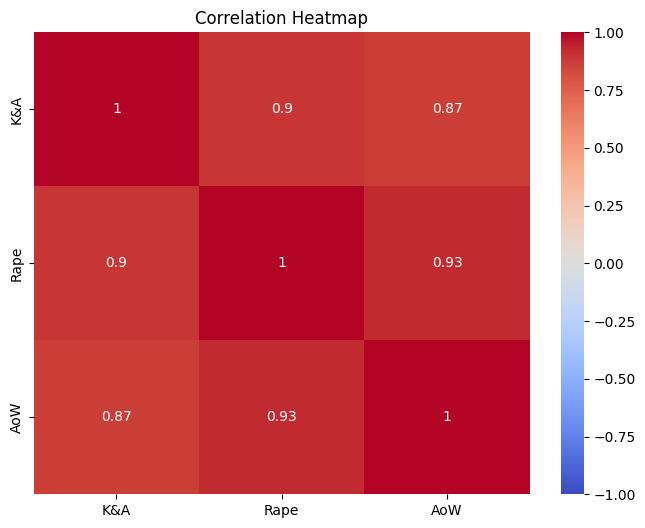

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (Replace this with your actual data)
# Assuming df is already loaded from the previous steps

# Calculate individual correlations
correlation_KA_Rape = Data['K&A'].corr(Data['Rape'])
print(f"Correlation between 'K&A' and 'Rape': {correlation_KA_Rape}")

correlation_Rape_AoW = Data['Rape'].corr(Data['AoW'])
print(f"Correlation between 'Rape' and 'AoW': {correlation_Rape_AoW}")

# Create a correlation matrix for the relevant columns
selected_columns = ['K&A', 'Rape', 'AoW']
correlation_matrix = Data[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


In [122]:
X_pre = Data[['AoW','K&A']]
y_pre = Data['Rape']

In [123]:
X = X_pre
y = y_pre

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.27,random_state=27)
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [126]:
MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'The mean square error is: {MSE}')
print(f'The R2-score is: {r2}')

The mean square error is: 0.28349716477403775
The R2-score is: 0.9278996772903855
